<a href="https://colab.research.google.com/github/Nov05/Google-Colaboratory/blob/master/20230901_python_abstract_vs_interface_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **\<TOP>**  
* created by nov05 on 2023-09-01

# **Protocol or ABC in Python**  

* **Abstract Base Class**: type-checking, inheritance
* **Protocal**: duck-typing, interface segragation

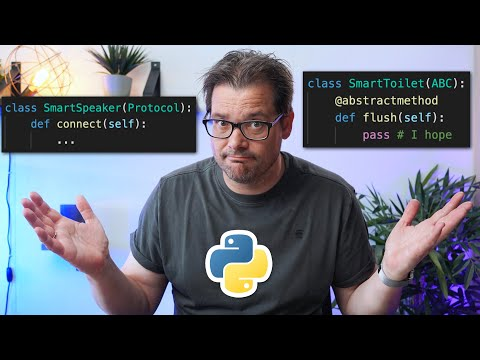

In [1]:
## Protocol Or ABC In Python - When to use which one? by ArjanCodes
## https://www.youtube.com/watch?v=xvb5hGLoK0A
from IPython.display import YouTubeVideo
YouTubeVideo('xvb5hGLoK0A')

* reddit: [What's the point of ABC & @abstractmethod](https://www.reddit.com/r/learnpython/comments/osiogd/whats_the_point_of_abc_abstractmethod/)    
```
zanfar • 2 yr. ago  
@abstractmethod is for when you:
• Require all children to have a method
• Don't have enough information to define that method in the parent
```

* reddit: [Interfaces with Protocols: why not ditch ABC for good?](https://www.reddit.com/r/Python/comments/10ikape/interfaces_with_protocols_why_not_ditch_abc_for/)  
```
aikii • 7 mo. ago
Unfortunately, on pycharm "go to implementation" works fine for ABCs, but not for Protocols.
It's also the case on VSCode ( "find all references" ). Quite a bummer.
```
[Building Implicit Interfaces in Python with Protocol Classes
Andrew Brookins](https://andrewbrookins.com/technology/building-implicit-interfaces-in-python-with-protocol-classes/) - 05 July 2020   
```
thedeepself • 7 mo. ago
The author basically sets up a straw man problem and then solves his straw man problem. He had no business creating
instances of the object outside of the class itself. If he had simply called a constructor methods within the classes
then the other class wouldn't have been attempting to make instances of those other classes.
```
https://glyph.twistedmatrix.com/2021/03/interfaces-and-protocols.html#runtime-support  
```
In modern Python code, when you have an abstract collection of behavior, you should probably consider using a
Protocol to describe it by default. However, Interface is also staying up to date with modern Python tooling by with
Mypy support, and it can be worthwhile for more sophisticated consumers that want support for nominal typing, or that
want to draw on its reach adaptation and component registration feature-set.
```

**Implementing an Interface in Python**    
https://realpython.com/python-interface/  

In [4]:
!python --version
## colab default Python 3.10.12

Python 3.10.12


# **ABC: Abstract Methods and Properties**

* **How to Write Cleaner Python Code Using Abstract Classes**  
Petar Marković, 5 min read · Feb 18, 2023  
https://blog.teclado.com/python-abc-abstract-base-classes/  

In [38]:
from abc import ABC, abstractmethod

class Animal(ABC):
    @property
    def food_eaten(self):
        return self._food

    @food_eaten.setter
    def food_eaten(self, food):
        if food in self.diet:
            self._food = food
        else:
            raise ValueError(f"You can't feed this animal with {food}.")

    @property
    @abstractmethod
    def diet(self):
        pass

    @abstractmethod
    def feed(self, time):
        pass

class Lion(Animal):
    @property
    def diet(self):
        return ["antelope", "cheetah", "buffaloe"]

    def feed(self, time):
        print(f"Feeding a lion with {self._food} meat! At {time}")

class Snake(Animal):
    @property
    def diet(self):
        return ["frog", "rabbit"]

    def feed(self, time):
        print(f"Feeding a snake with {self._food} meat! At {time}")


leo = Lion()
leo.food_eaten = "antelope"
leo.feed("10:10 AM")
adam = Snake()
adam.food_eaten = "frog"
adam.feed("10:20 AM")
try:
    leo = Lion()
    leo.food_eaten = "carrot"
    leo.feed("10:10 AM")
except Exception as e:
    print(f"{type(e).__name__}: {e}")

Feeding a lion with antelope meat! At 10:10 AM
Feeding a snake with frog meat! At 10:20 AM
ValueError: You can't feed this animal with carrot.


# **Protocal: The Five-Minute Version**  

In [18]:
from typing import Protocol


class Flyer(Protocol):
    def fly(self) -> None:
        """A Flyer can fly"""


class FlyingHero:
    """This hero can fly, which is BEAST."""
    def fly(self):
        # Do some flying...
        print('I am flying.')


class RunningHero:
    """This hero can run. Better than nothing!"""
    def run(self):
        # Run for your life!
        print('I am running.')


class Board:
    """An imaginary game board that doesn't do anything."""
    def make_fly(self, obj: Flyer) -> None:   # <- Here's the magic
        """Make an object fly."""
        return obj.fly()


def main() -> None:
    try:
        board = Board()
        board.make_fly(FlyingHero())
        board.make_fly(RunningHero())  # <- Fails mypy type-checking!
    except Exception as e:
        print(f"{type(e).__name__}: {e}")


if __name__ == '__main__':
    main()

I am flying.
AttributeError: 'RunningHero' object has no attribute 'fly'


# **Protocal: A Longer Example**  
It is probably not a good example.  

In [35]:
"""
protocol_classes.py: An example of using protocol classes.
"""

from dataclasses import dataclass
from enum import Enum
from typing import Any
from typing import Protocol


class Direction(Enum):
    N = 'n'
    E = 'e'
    S = 's'
    W = 'w'
    NE = 'ne'
    SE = 'se'
    SW = 'sw'
    NW = 'nw'


@dataclass
class Movement:
    """A movement by an object in a direction."""
    obj: Any
    distance_meters: int
    direction: Direction


class Waiter(Protocol):
    def wait(self, actions_spent: int, direction: Direction) -> Movement:
        """A Waiter can wait"""


class Flyer(Protocol):
    def fly(self, actions_spent: int, direction: Direction) -> Movement:
        """A Flyer can fly"""


class Runner(Protocol):
    def run(self, actions_spent: int, direction: Direction) -> Movement:
        """A Runner can run"""


class BaseHero:
    @property
    def max_speed(self) -> int:
        return 1

    def wait(self, actions_spent: int, direction: Direction) -> Movement:
        return Movement(obj=self, distance_meters=0, direction=direction)


class RunningHero(BaseHero):
    """This hero can run, which is better than nothing."""
    @property
    def run_speed(self) -> int:
        return self.max_speed * 2

    def run(self, actions_spent: int, direction: Direction) -> Movement:
        return Movement(obj=self,
                        distance_meters=self.run_speed * actions_spent,
                        direction=direction)


class FlyingHero(BaseHero):
    """This hero can fly, which is BEAST."""
    @property
    def fly_speed(self) -> int:
        return self.max_speed * 5

    def fly(self, actions_spent: int, direction: Direction) -> Movement:
        return Movement(obj=self,
                        distance_meters=self.fly_speed * actions_spent,
                        direction=direction)


class Board:
    """An imaginary game board that doesn't do anything."""
    def make_wait(self, obj: Waiter, direction: Direction,
                  actions_spent: int) -> Movement:
        """Make an object wait.

        ``obj`` is the object to make wait
        ``actions`` is the number of consecutive actions taken to wait

        Returns the total distance in meters that ``piece`` moved on the board
        while waiting (could happen...).
        """
        return obj.wait(actions_spent, direction)

    def make_run(self, obj: Runner, direction: Direction,
                 actions_spent: int) -> Movement:
        """Make an object run.

        ``obj`` is the object to make run
        ``actions`` is the number of consecutive actions taken to move

        Returns the total distance in meters that ``obj`` moved on the board.
        """
        return obj.run(actions_spent, direction)

    def make_fly(self, obj: Flyer, direction: Direction,
                 actions_spent: int) -> Movement:
        """Make an object fly.

        ``obj`` is the object to make fly
        ``actions`` is the number of consecutive actions taken to move

        Returns the total distance in meters that ``obj`` moved on the board.
        """
        return obj.fly(actions_spent, direction)


def main() -> None:
    board, waiter, runner, flyer = Board(), BaseHero(), RunningHero(), FlyingHero()
    waiter_move = board.make_wait(waiter, Direction.N, 2)
    try:
        waiter_move = board.make_run(waiter, Direction.N, 2)
    except Exception as e:
            print(f"{type(e).__name__}: {e}")
    runner_move = board.make_run(runner, Direction.NW, 1); print(runner_move)
    runner_move = board.make_run(runner, Direction.NW, 2); print(runner_move)
    flyer_move = board.make_fly(flyer, Direction.S, 2)
    print(f"<{flyer_move.direction}: '{flyer_move.direction.value}'>")
    print()
    heroes = (('Hero', 'Total Space Moved (m)'),
              ('a waiting hero', waiter_move.distance_meters),
              ('a running hero', runner_move.distance_meters),
              ('a flying hero', flyer_move.distance_meters))
    for description, movement in heroes:
        # print("\t{:<22} {:>25}".format(description, movement))
        print(f"\t{description:<22} {movement:>25}")


if __name__ == '__main__':
    main()

AttributeError: 'BaseHero' object has no attribute 'run'
Movement(obj=<__main__.RunningHero object at 0x79c3f9183cd0>, distance_meters=2, direction=<Direction.NW: 'nw'>)
Movement(obj=<__main__.RunningHero object at 0x79c3f9183cd0>, distance_meters=4, direction=<Direction.NW: 'nw'>)
<Direction.S: 's'>

	Hero                       Total Space Moved (m)
	a waiting hero                                 0
	a running hero                                 4
	a flying hero                                 10


# **\<BOTTOM>**